Dataset Shape: (1597, 27)

First 5 rows:
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  Na

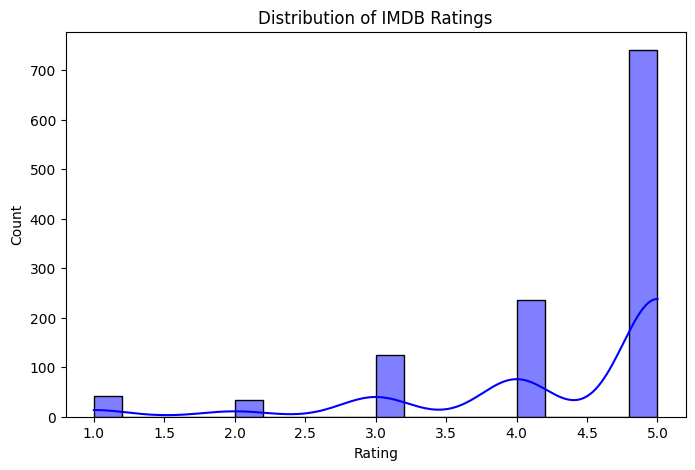

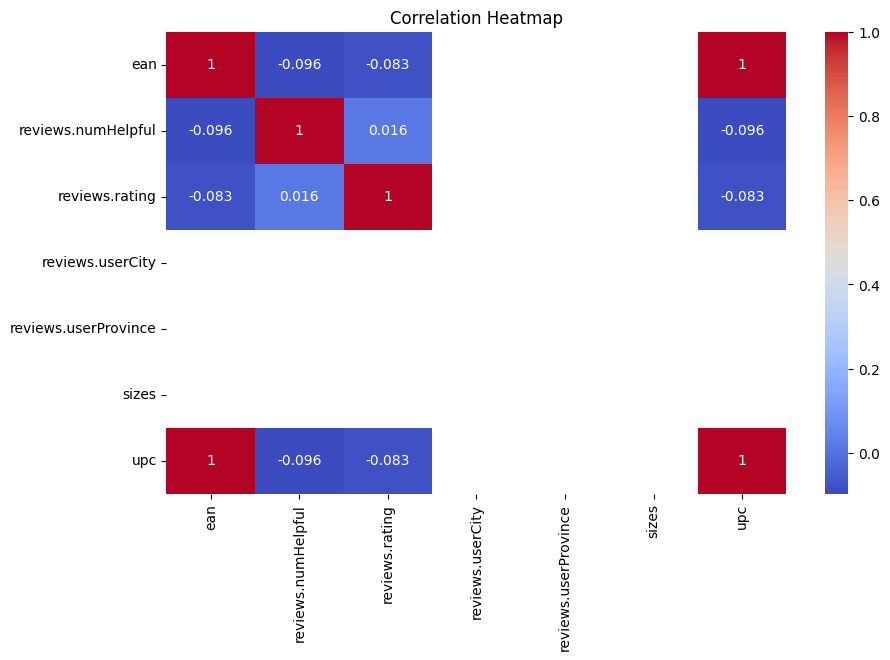

In [4]:
#movie IMDB Rating analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ================== 1. Load Dataset ==================
# Replace 'imdb_movies.csv' with your file name
df = pd.read_csv('movie IMDB Rating.csv')


print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
# ================== 2. Data Cleaning ==================
print("\nMissing values per column:")
print(df.isnull().sum())
print(df.columns)


# Example: Drop rows with missing ratings
df = df.dropna(subset=['reviews.rating'])


# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)


# ================== 3. Exploratory Data Analysis (EDA) ==================
# Distribution of IMDB Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['reviews.rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
# Genre vs Rating comparison
if 'Genre' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Genre', y='reviews.rating', data=df)
    plt.xticks(rotation=45)
    plt.title("Genre vs IMDB Rating")
    plt.show()


# Year vs Average Rating
if 'Year' in df.columns:
    year_rating = df.groupby('Year')['reviews.rating'].mean().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Year', y='reviews.rating', data=year_rating, marker='o')
    plt.title("Average IMDB Rating by Year")
    plt.show()
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Top 10 movies by rating
if 'Title' in df.columns:
    top10 = df.sort_values(by='reviews.rating', ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x='reviews.rating', y='Title', data=top10, palette='viridis')
    plt.title("Top 10 Movies by IMDB Rating")
    plt.show()
